<a href="https://colab.research.google.com/github/thalia-hsu/big_data_course/blob/main/bank_loan_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/thalia-hsu/big_data_course/refs/heads/main/cleaned_data.csv')
df.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.894737,0.50,0.457143,0.90625,0.33632,0.824832,0.438153,1.000000,1
1,0.710526,0.00,0.828571,0.78125,0.30176,0.824552,0.276664,0.988548,0
2,0.368421,0.50,0.285714,0.18750,0.28640,0.955717,0.465155,0.987191,1
3,0.368421,0.75,0.171429,0.09375,0.25664,0.988229,0.378607,0.966300,1
4,0.763158,0.25,0.742857,0.50000,0.55584,0.513733,0.492555,0.949334,0
5,0.526316,0.75,0.428571,0.18750,0.50848,0.526345,0.390540,0.944527,1
6,0.578947,0.00,0.571429,0.03125,0.46528,0.484585,0.129570,0.936300,0
7,0.763158,0.25,0.457143,0.43750,0.41984,0.715527,0.655551,0.933421,1
8,0.815789,0.00,0.971429,0.53125,0.75520,0.479260,0.987562,0.932650,1
9,0.657895,0.50,0.657143,0.00000,0.60832,0.335482,0.007869,0.905863,0


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Define X (features) and y (target)
X = df.drop(columns=['default'])  # Drop the target column
y = df['default']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the sets
X_train.shape, X_test.shape


((3952, 8), (988, 8))

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the neural network structure with L2 regularization
model = Sequential([
    Dense(16, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),  # First hidden layer with L2
    Dropout(0.2),  # Dropout for regularization
    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),  # Second hidden layer with L2
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with tuned learning rate
optimizer = Adam(learning_rate=0.0005)  # Reduced learning rate from default (0.001) to 0.0005
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7501 - loss: 0.6377 - val_accuracy: 0.7510 - val_loss: 0.5787
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7470 - loss: 0.5747 - val_accuracy: 0.7510 - val_loss: 0.5408
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7575 - loss: 0.5329 - val_accuracy: 0.7540 - val_loss: 0.5092
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7545 - loss: 0.5175 - val_accuracy: 0.7733 - val_loss: 0.4866
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7718 - loss: 0.5023 - val_accuracy: 0.7804 - val_loss: 0.4706
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7820 - loss: 0.4756 - val_accuracy: 0.7834 - val_loss: 0.4581
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7761 - loss: 0.4890 - val_accuracy: 0.7955 - val_loss: 0.4493
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7840 - loss: 0.4745 - val_accuracy: 0

In [ ]:
# Predictions (convert probabilities to 0 or 1)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.3).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.7773
Confusion Matrix:
[[586 156]
 [ 64 182]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       742
           1       0.54      0.74      0.62       246

    accuracy                           0.78       988
   macro avg       0.72      0.76      0.73       988
weighted avg       0.81      0.78      0.79       988



In [ ]:
# Predictions (convert probabilities to 0 or 1)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.8117
Confusion Matrix:
[[689  53]
 [133 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       742
           1       0.68      0.46      0.55       246

    accuracy                           0.81       988
   macro avg       0.76      0.69      0.71       988
weighted avg       0.80      0.81      0.80       988



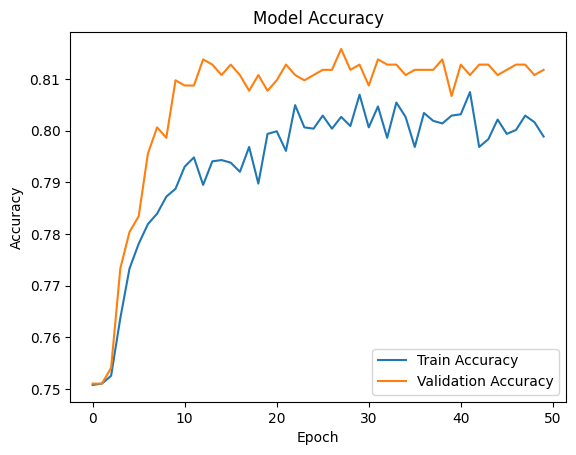

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
